
### Importing Libraries

# Know Your Data Points

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Rosmann Data
database = "/content/drive/MyDrive/AlmaBetter /Regression/Copy of Rossmann Stores Data.csv"
sales_df =pd.read_csv(database)
# Store data
database = "/content/drive/MyDrive/AlmaBetter /Regression/Copy of store.csv"
store_df =pd.read_csv(database)

<ipython-input-5-cdce9591e4ce>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df =pd.read_csv(database)


In [6]:

# Exploring Data Set
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
sales_df.info()

#Date is in Object so in comming steps we'll change this in Date Format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
sales_df.tail()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [9]:
sales_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:

# change datatype object into date format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [11]:
sales_df['SchoolHoliday'] .unique()


array([1, 0])

In [12]:
#Checking null values
sales_df.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [15]:
#For Checking Uniques values in the Columns
lis = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in lis:
  print(i)
  print(sales_df[i].unique())
  print(">>>>>>>>>>>>>>>>>>>")



DayOfWeek
[5 4 3 2 1 7 6]
>>>>>>>>>>>>>>>>>>>
StateHoliday
['0' 'a' 'b' 'c' 0]
>>>>>>>>>>>>>>>>>>>
SchoolHoliday
[1 0]
>>>>>>>>>>>>>>>>>>>


In [16]:
#Checking unique values of Store Data Frame

store_df.nunique()


Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [17]:

# Filling the Missing values with 0
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)



In [18]:
store_df.isna().sum()


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [19]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [20]:
#Merging both the Data Frames using pd.merge function from pandas
final_one = pd.merge(sales_df, store_df, on='Store', how='left')


In [21]:
final_one

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [22]:
#Dealing with Categorical Values

#Change data types object to int
final_one.loc[final_one['StateHoliday'] == '0', 'StateHoliday'] = 0
final_one.loc[final_one['StateHoliday'] == 'a', 'StateHoliday'] = 1
final_one.loc[final_one['StateHoliday'] == 'b', 'StateHoliday'] = 2
final_one.loc[final_one['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
final_one['StateHoliday'] = final_one['StateHoliday'].astype(int, copy=False)


# change Data Types object into int
final_one.loc[final_one['Assortment'] == 'a', 'Assortment'] = 0
final_one.loc[final_one['Assortment'] == 'b', 'Assortment'] = 1
final_one.loc[final_one['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
final_one['Assortment'] = final_one['Assortment'].astype(int, copy=False)

# change Data Types object into int
final_one.loc[final_one['StoreType'] == 'a', 'StoreType'] = 0
final_one.loc[final_one['StoreType'] == 'b', 'StoreType'] = 1
final_one.loc[final_one['StoreType'] == 'c', 'StoreType'] = 2
final_one.loc[final_one['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
final_one['StoreType'] = final_one['StoreType'].astype(int, copy=False)

In [23]:
print(final_one[['StateHoliday', 'Assortment', 'StoreType']].nunique())


StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [24]:
final_one.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [25]:
#Deailing with DateTime Datatypes

# code for changing format of date from object to datetime
final_one['Date'] = pd.to_datetime(final_one['Date'], format= '%Y-%m-%d')




In [26]:
# code for change object into date format
final_one['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final_one['Date']).month


In [27]:
# code for change float into integer
final_one['CompetitionOpenSinceYear']= final_one['CompetitionOpenSinceYear'].astype(int)
final_one['Promo2SinceYear']= final_one['Promo2SinceYear'].astype(int)


In [28]:
# code for change float into integer
final_one['CompetitionDistance']= final_one['CompetitionDistance'].astype(int)
final_one['Promo2SinceWeek']= final_one['Promo2SinceWeek'].astype(int)

In [29]:
final_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

## Understanding Your Variables

In [30]:
final_one.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [32]:
final_one.describe().apply(lambda x: round(x, 2))


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


## 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

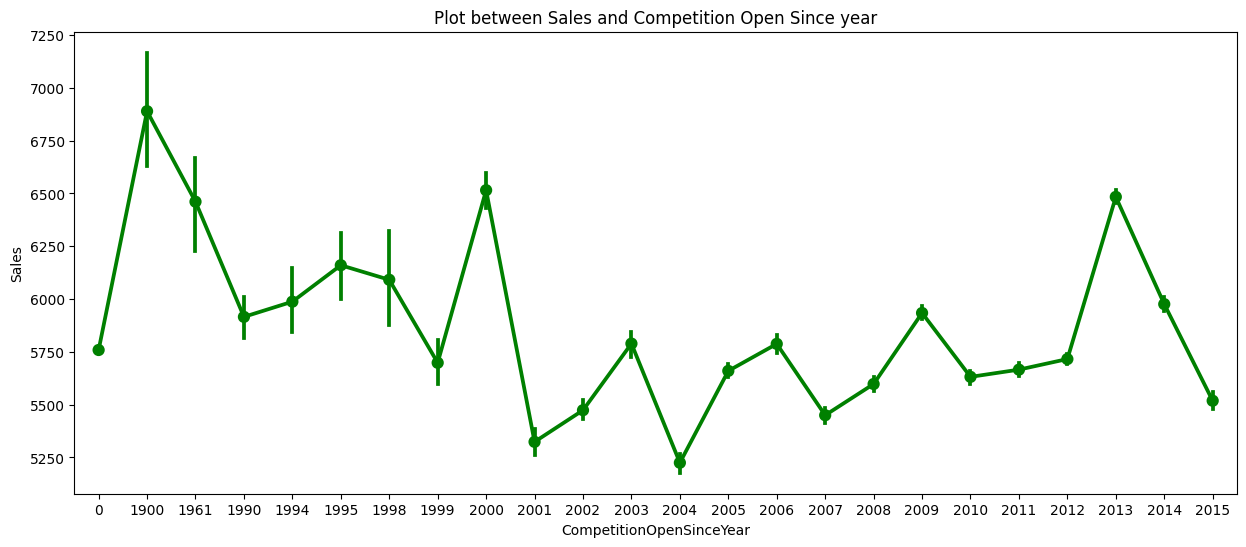

In [33]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final_one,color='Green')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

**From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores ,hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly ,hence Sales got Decline year by year.**

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

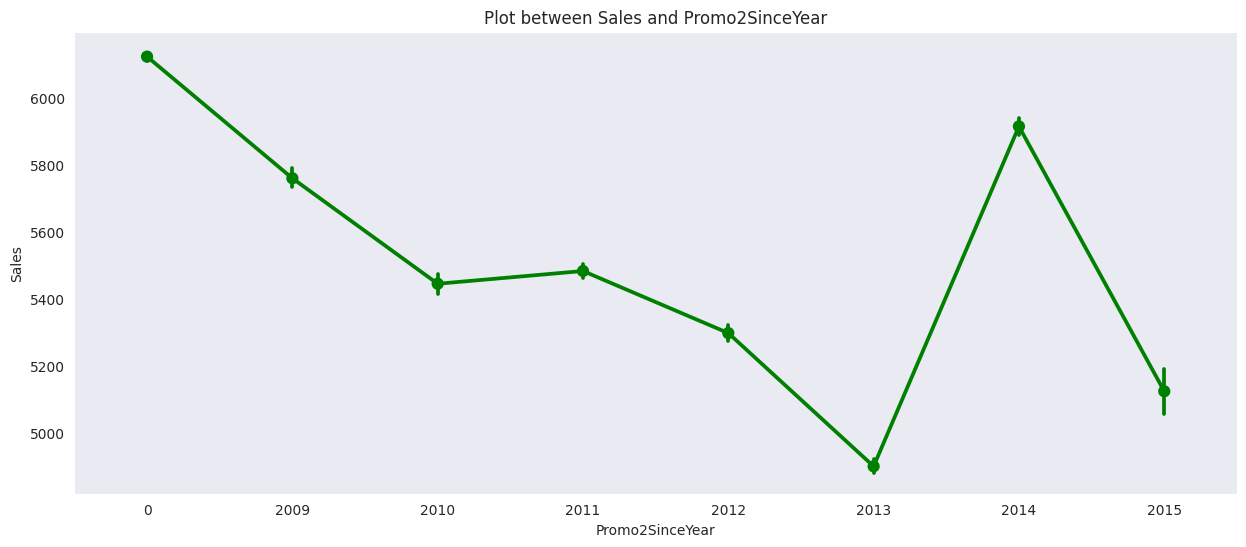

In [34]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final_one,color='Green')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')


**From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year**

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

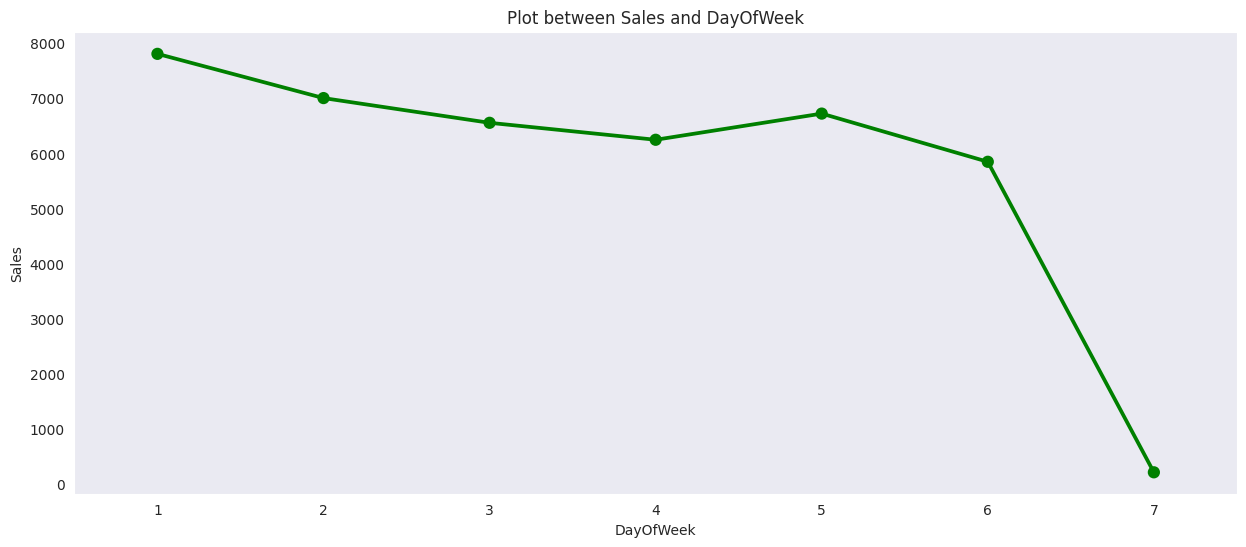

In [35]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final_one,color='Green')
sns.set_style("dark")
plt.title('Plot between Sales and DayOfWeek')

**From this graph we get insights that Maximum Sales is on Day 1 which is Monday and the same is decreasing till Day 6 which is Saturday .As most of the stores are closed on Day 7 which is Sunday ,so the Sales is closed to Zero.**

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

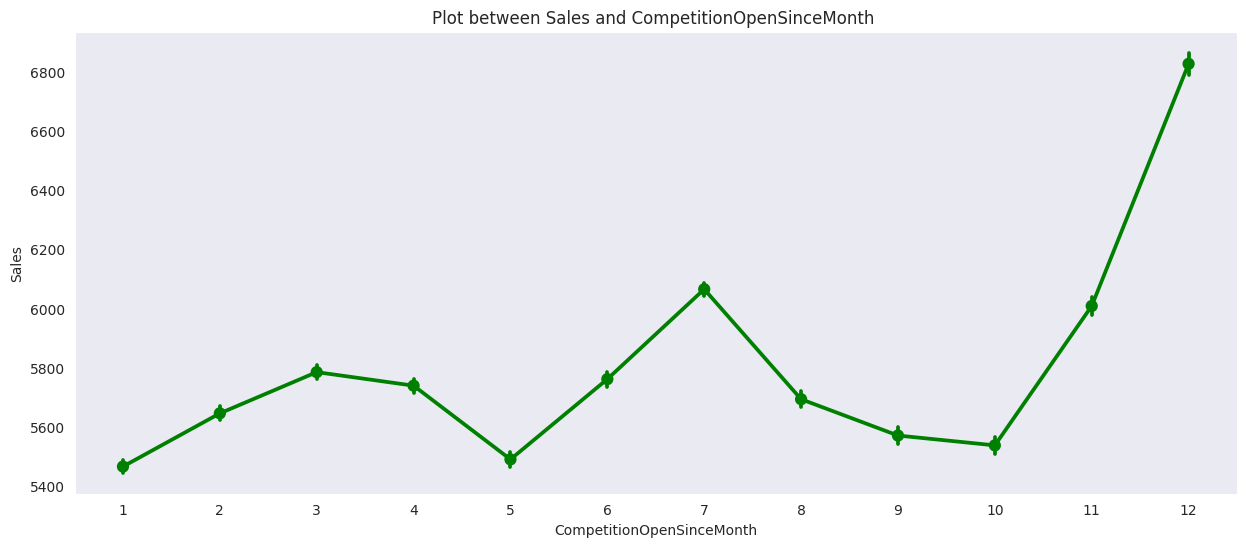

In [36]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final_one,color='Green')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

**Box Plot**

Text(0.5, 1.0, 'Boxplot For Sales Values')

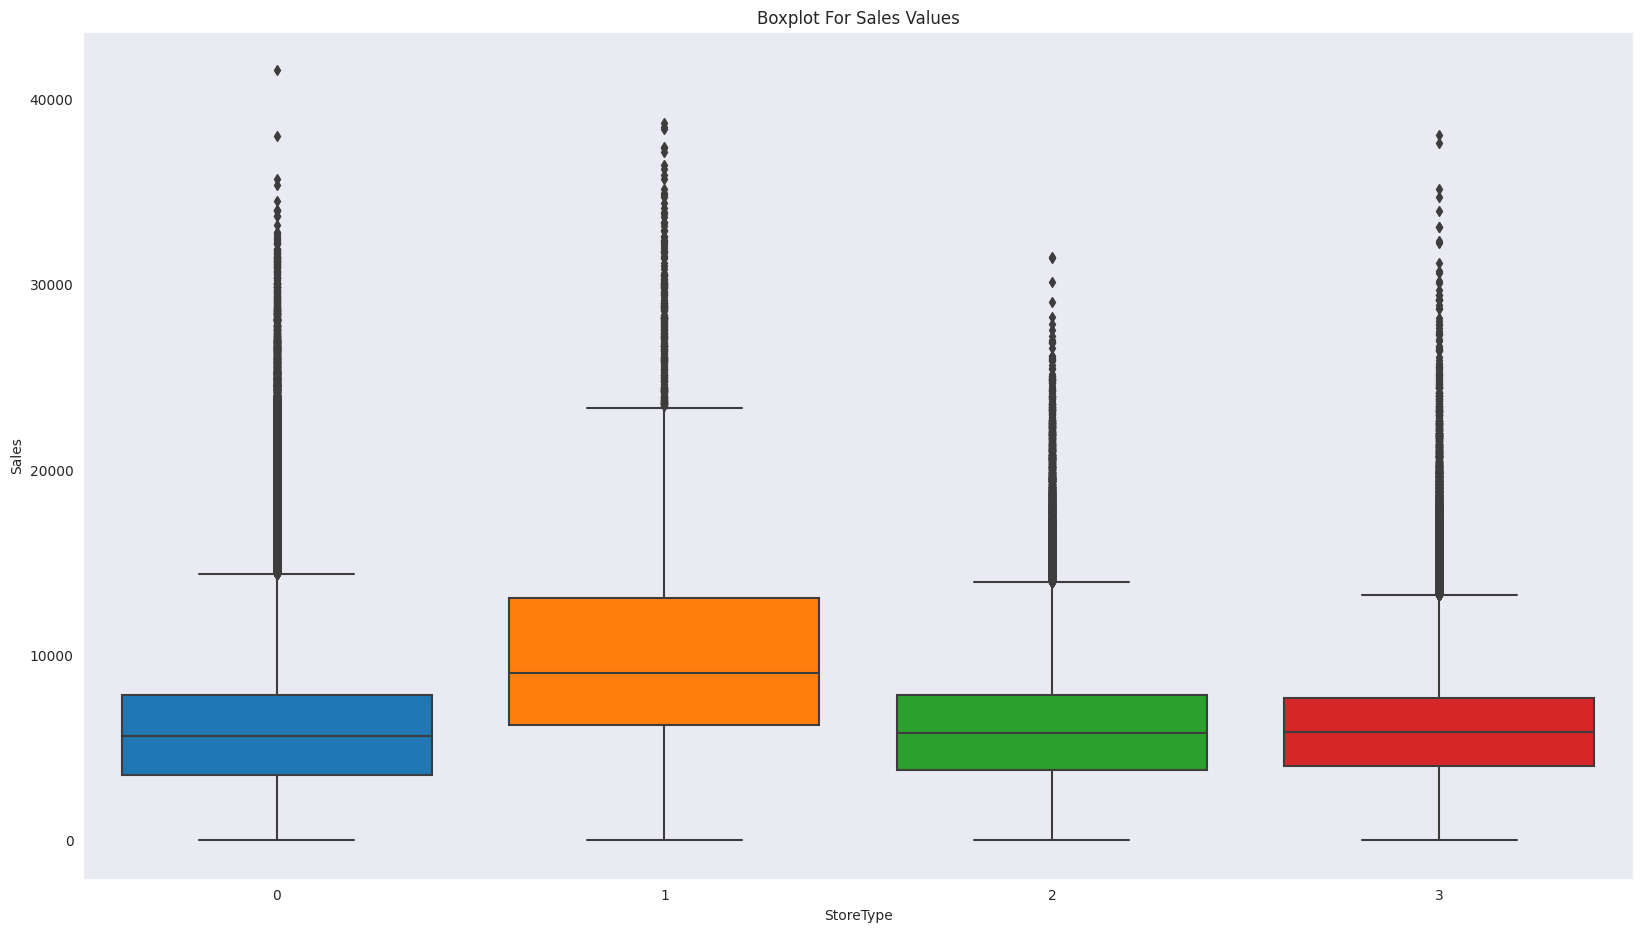

In [37]:

plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final_one, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

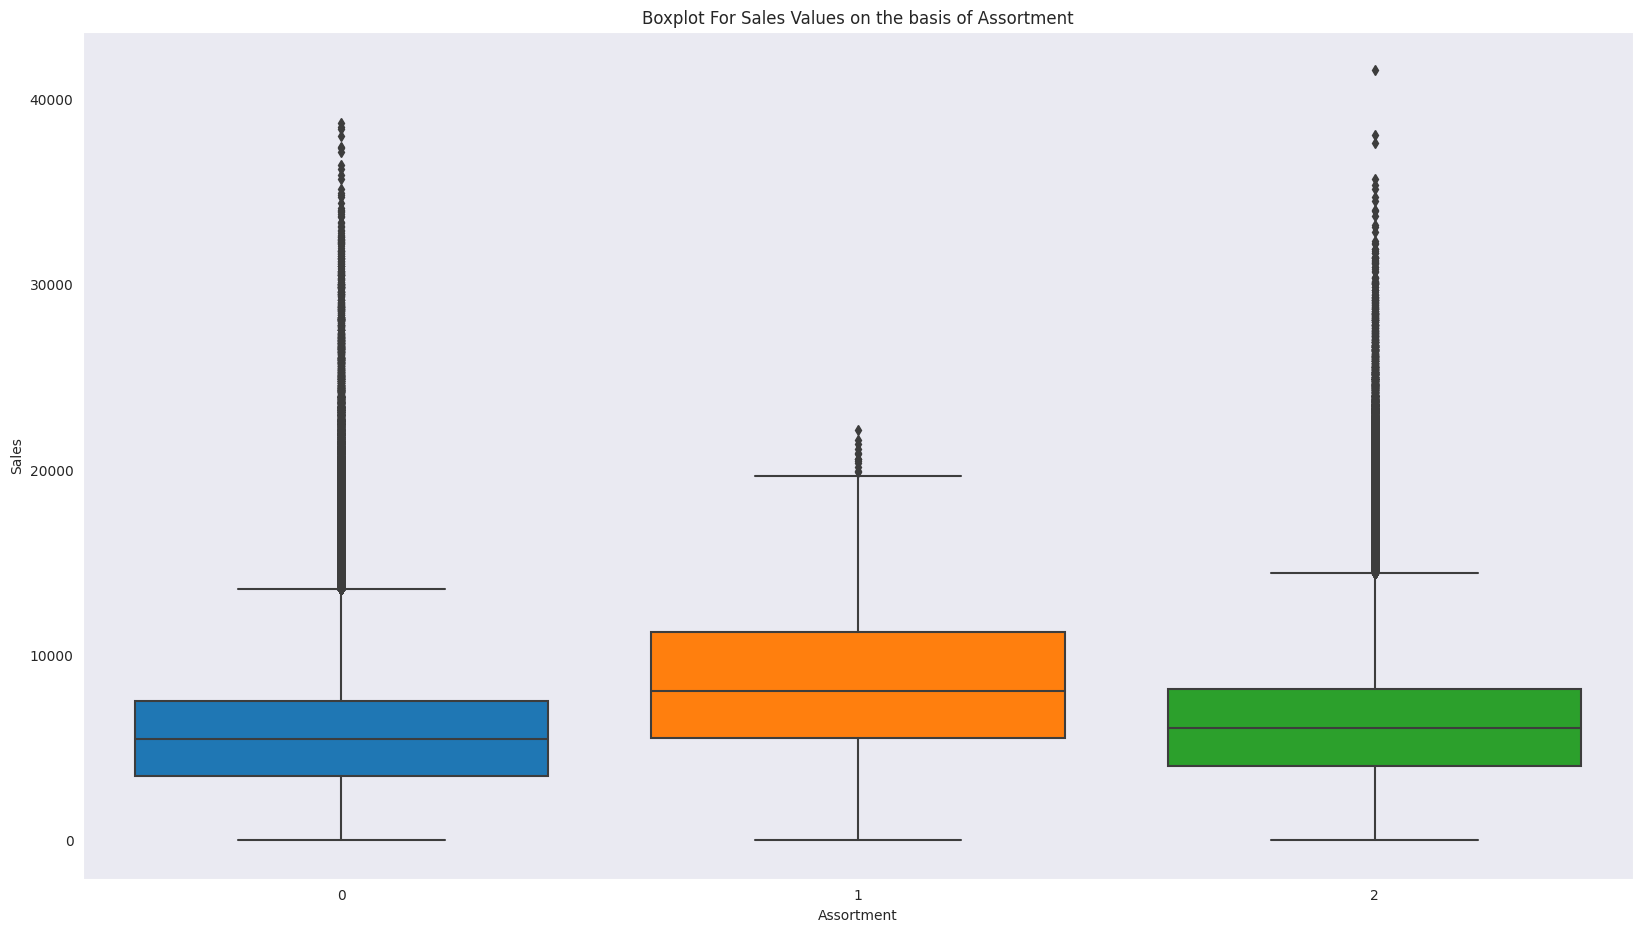

In [38]:

plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final_one, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

Text(0.5, 1.0, 'Store Daily Open Countplot')

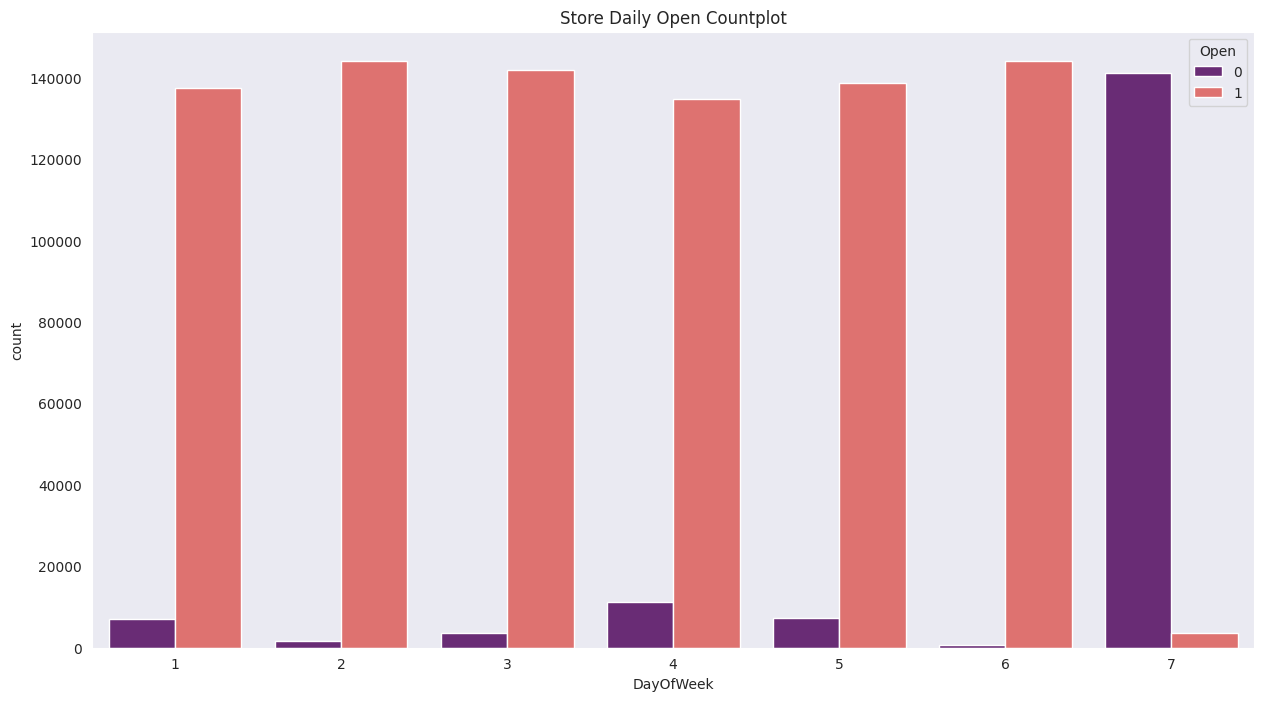

In [42]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= final_one, palette='magma')
plt.title('Store Daily Open Countplot')


Text(0.5, 1.0, 'Store Daily Promo Countplot')

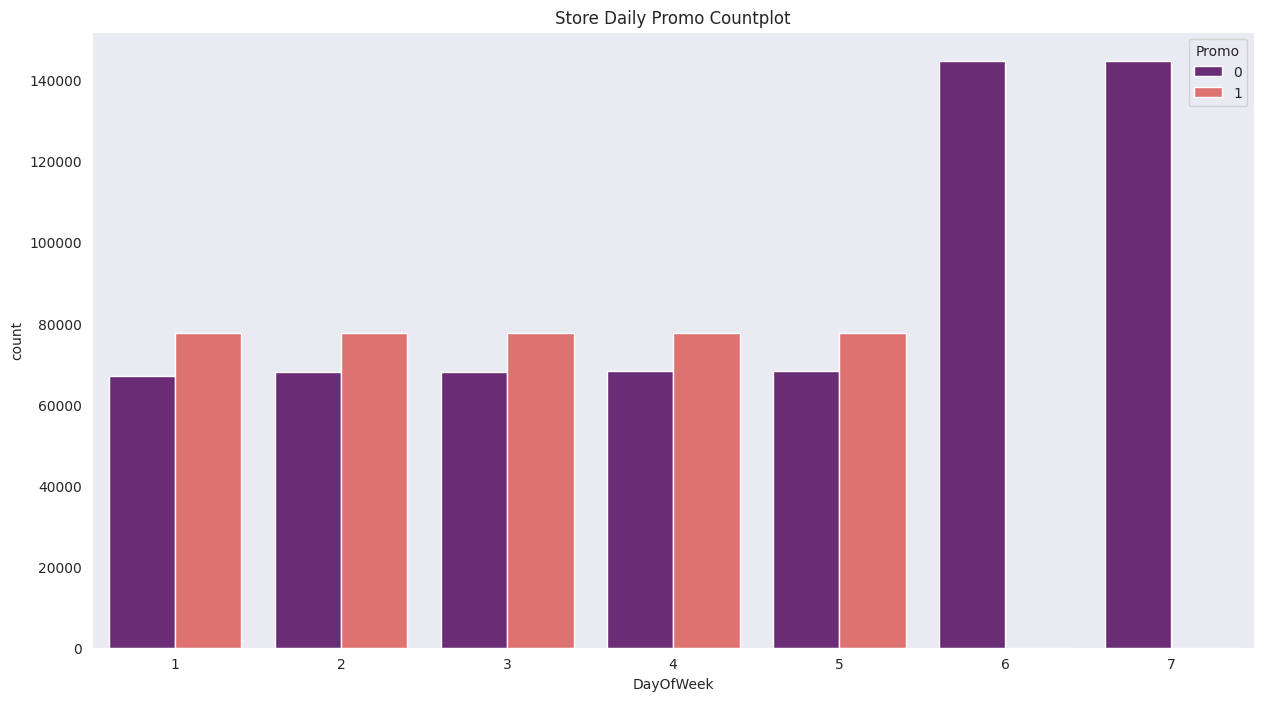

In [41]:

plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final_one, palette='magma')
plt.title('Store Daily Promo Countplot')

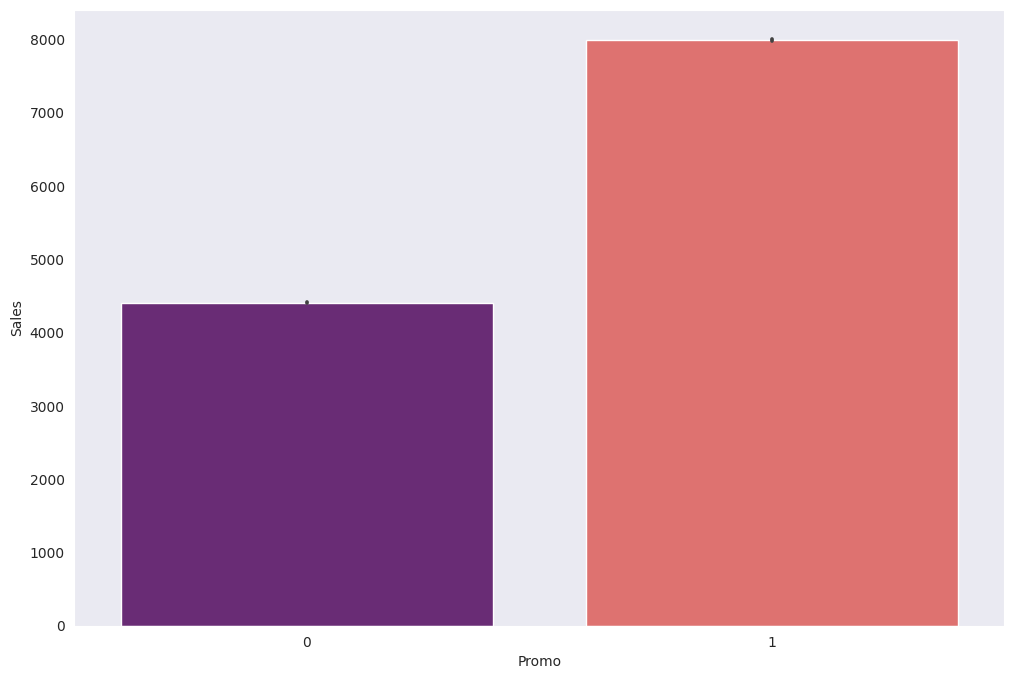

In [43]:
plt.figure(figsize=(12, 8))
promo_sales = sns.barplot(x="Promo", y="Sales", data=final_one, palette='magma')

**Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.**

State Holiday
0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None **bold text**

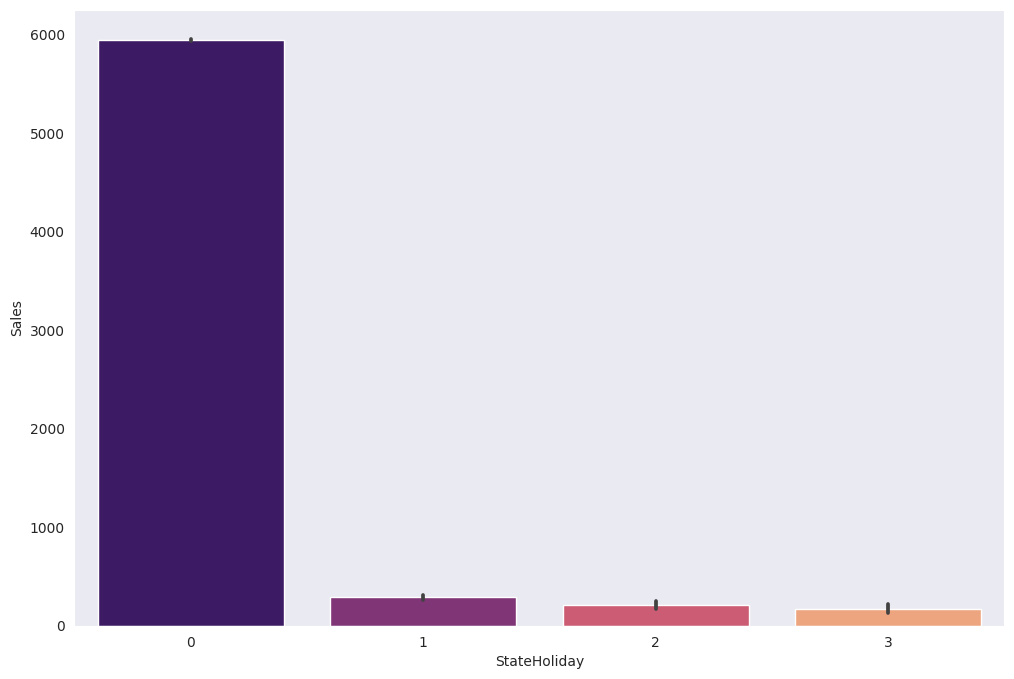

In [44]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final_one,palette='magma')

School Holiday
0='Not Holiday', 1='Holiday' **bold text**

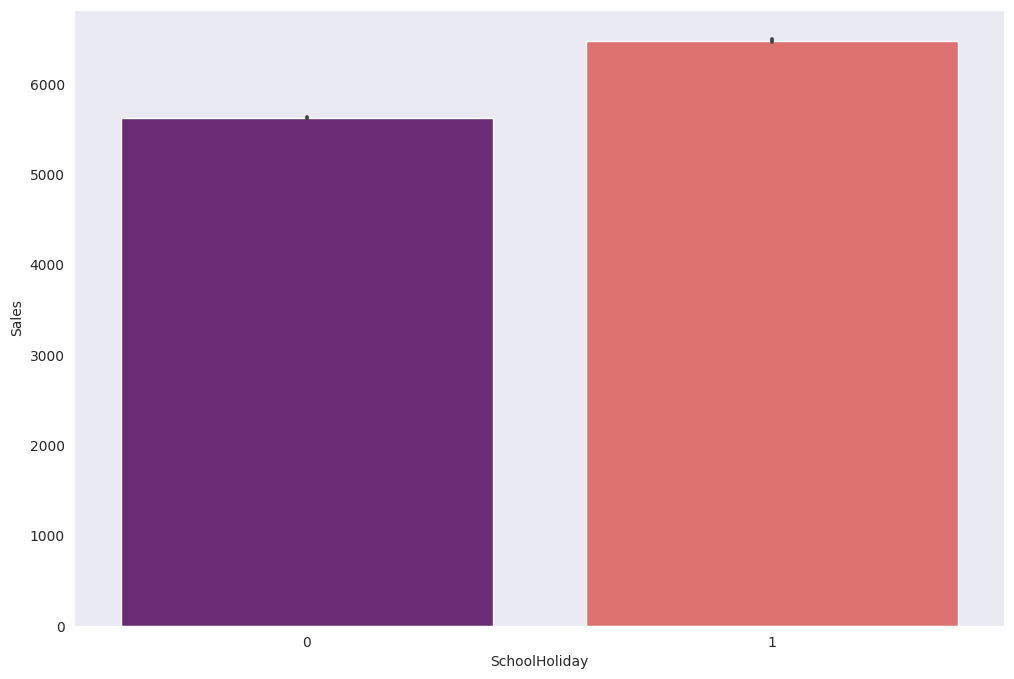

In [45]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final_one,palette='magma')

# Conclusion of EDA
1)From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.

2)From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.

3)Plot between Promotion and Sales shows that promotion helps in increasing Sales.

4)Type of Store plays an important role in opening pattern of stores.

5)All Type ‘b’ stores never closed except for refurbishment or other reason.

6)All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.

7)ssortment Level ‘b’ is only offered at Store Type ‘b’.

8)We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. **bold text**